## Notebook for kaggle competition -> Titanic - Machine Learning from Disaster
### Solution author -> Danuk Sanujaya Udagama

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import pandas as pd
from tabulate import tabulate

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import the data
dataset = pd.read_csv('train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Converting data into numerical format from text based 

In [17]:
# Convert the sex to numeric one hot encoding
toNumeric = preprocessing.OneHotEncoder()
sexTransformed = toNumeric.fit_transform(dataset[["Sex"]])
sex = pd.DataFrame(sexTransformed.toarray(), columns = toNumeric.get_feature_names_out(['Sex']))

# Convert the embarked to numeric one hot encoding
toNumeric = preprocessing.OneHotEncoder()
embarkedTransformed = toNumeric.fit_transform(dataset[["Embarked"]])
embarked = pd.DataFrame(embarkedTransformed.toarray(), columns = toNumeric.get_feature_names_out(['Embarked']))

# Get the Passenger class
data = dataset[["Pclass", "Age", "SibSp", "Parch", "Fare", "Survived"]]


keys = data.columns.tolist() + sex.columns.tolist() + embarked.columns.tolist()[:-1]
newDataSet = pd.concat([data, sex, embarked[["Embarked_C", "Embarked_Q", "Embarked_S"]]], ignore_index=True, axis=1)
newDataSet.columns = keys

newData = newDataSet

# Extract the training data
xTrain = newData.drop(columns = "Survived")
yTrain = newData["Survived"]

### Data analysis

In [18]:
#  The number of positive and negative examples in the data
positives = yTrain.value_counts()[1]
negatives = yTrain.value_counts()[0]
print("There are ", positives, " Positive examples")
print("There are ", negatives, " Negative examples")
print("The ratio of positives to negatives", positives/negatives)


There are  342  Positive examples
There are  549  Negative examples
The ratio of positives to negatives 0.6229508196721312


### General data

ValueError: autodetected range of [nan, nan] is not finite

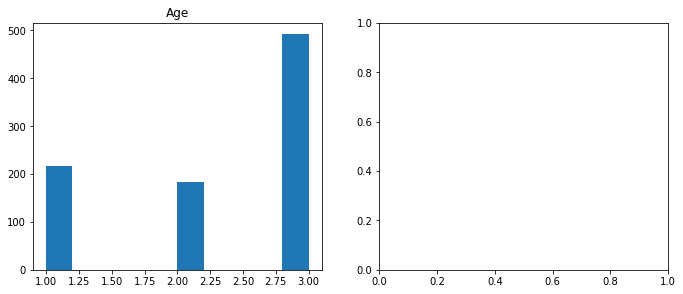

In [19]:
figure = plt.figure(figsize= (30,10))
# Plot the histograms of each feature
for i, j in enumerate(xTrain.columns.tolist()):
    plt.title(j)
    plt.subplot(2, len(xTrain.columns.tolist()) // 2, i + 1)
    counts, bins = np.histogram(xTrain[j].values)
    plt.hist(bins[:-1], bins, weights=counts)
plt.show()

### Comparing the distributions between the people who survived and the people who didn't

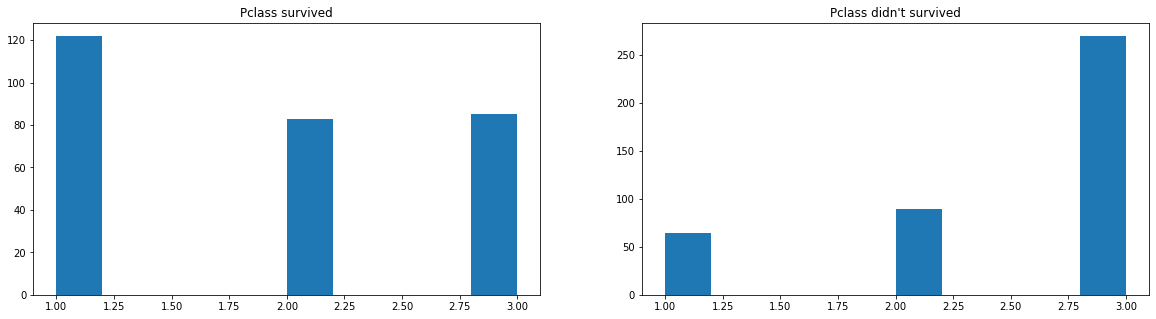

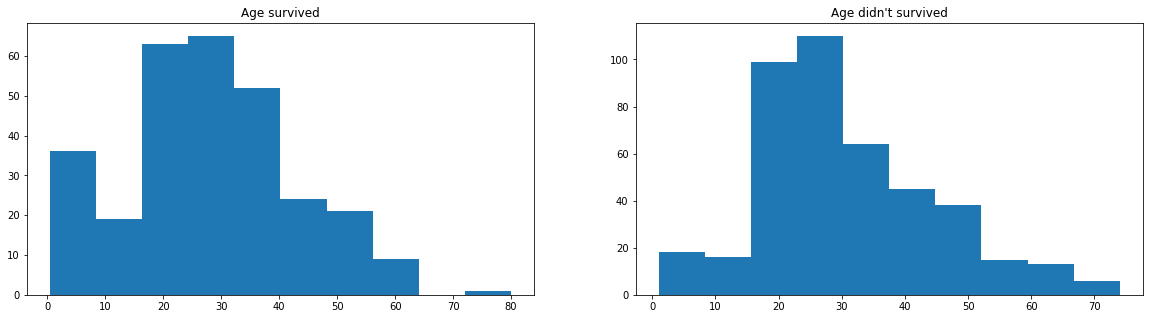

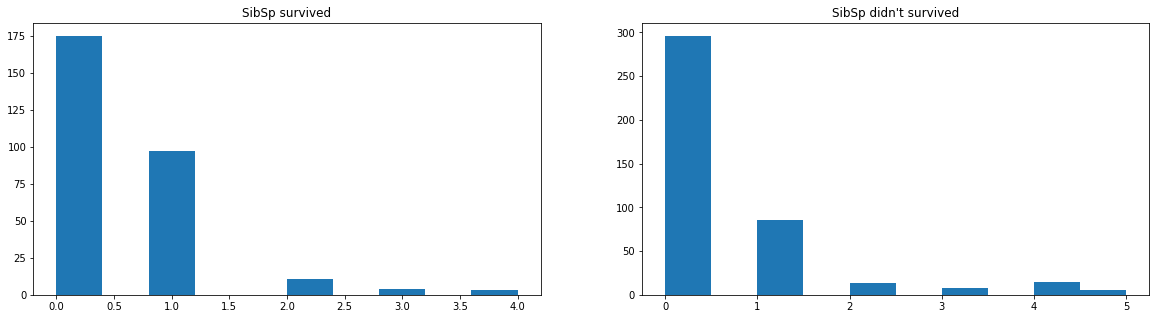

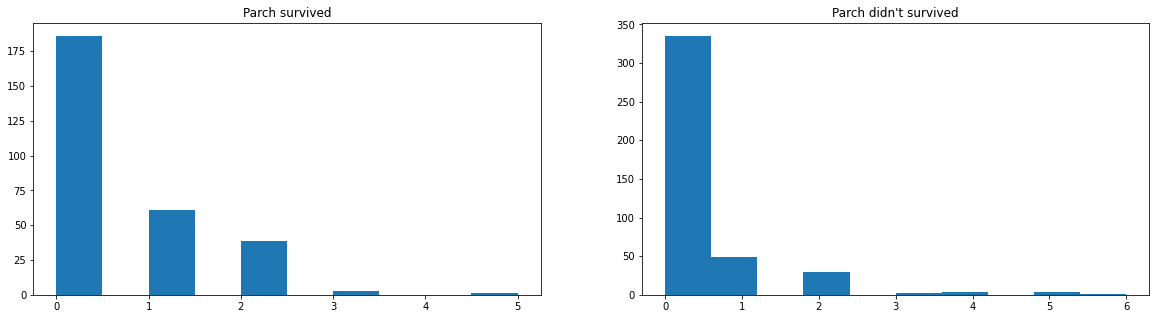

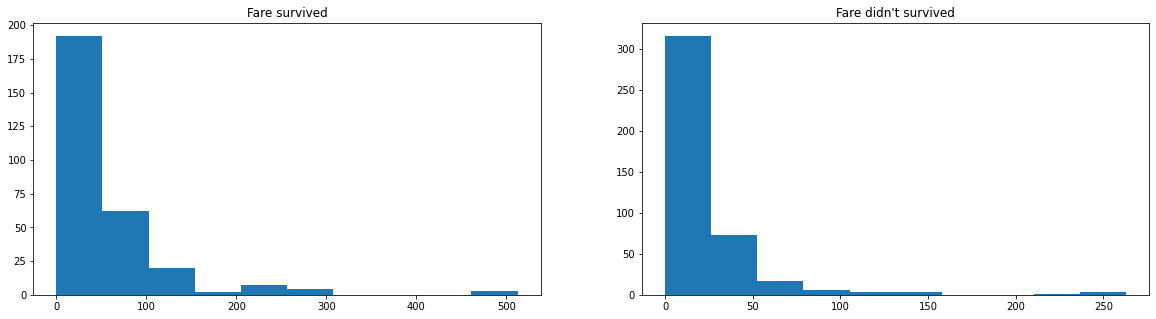

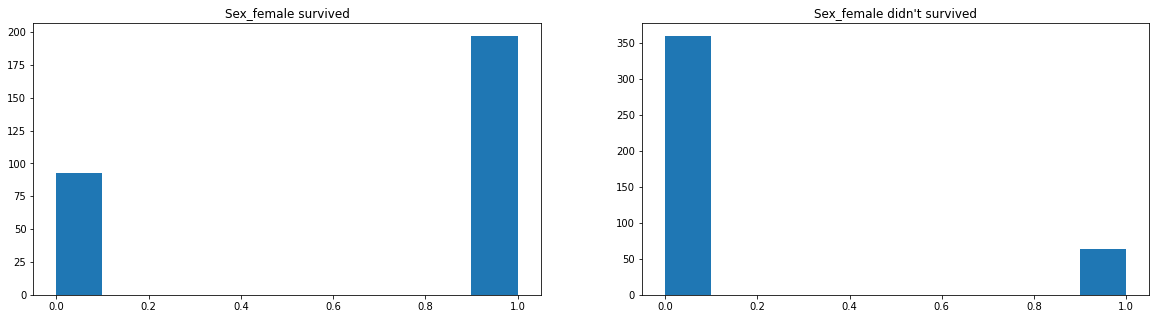

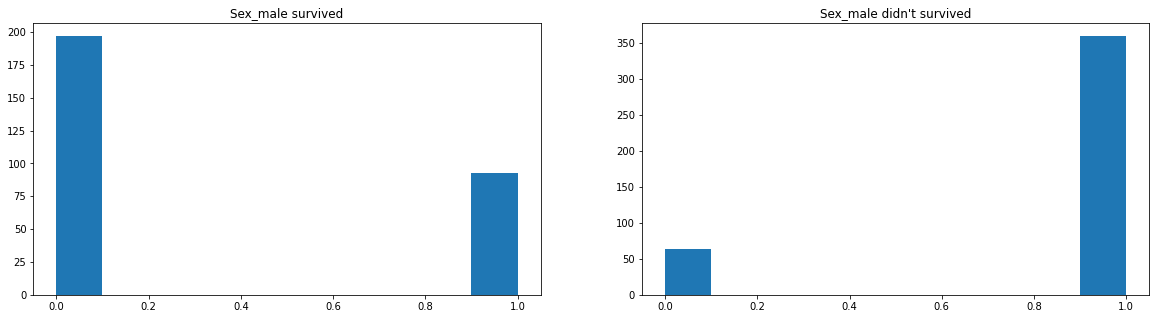

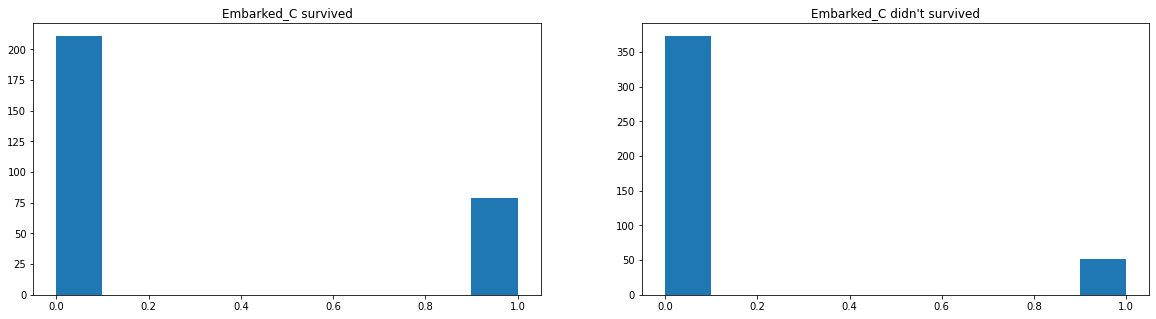

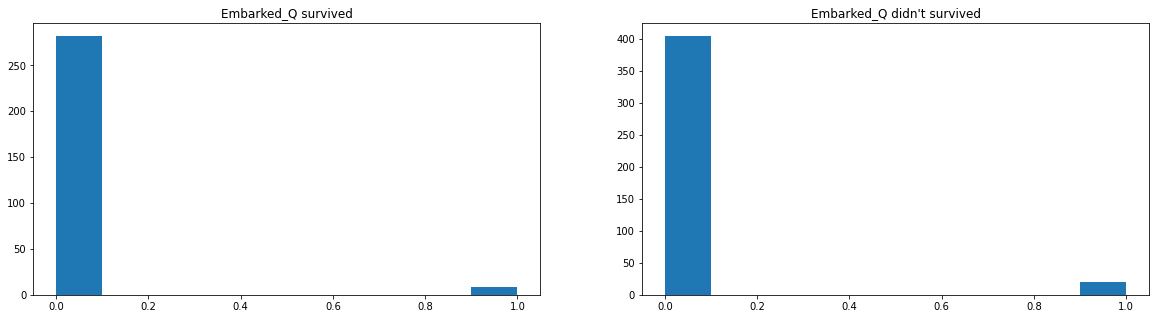

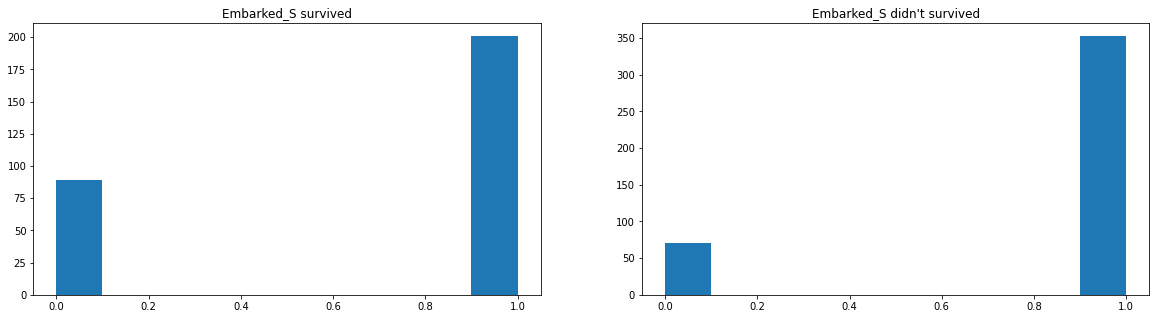

In [6]:
idx = yTrain == 1
survived = xTrain[idx]
didntSurvive = xTrain[~idx]

for j in xTrain.columns.tolist():
    figure = plt.figure(figsize=(20,5))
    
    plt.subplot(1, 2, 1)
    plt.title(j + " survived")
    counts, bins = np.histogram(survived[j].values)
    plt.hist(bins[:-1], bins, weights=counts)
    
    plt.subplot(1, 2, 2)
    plt.title(j + " didn't survived")
    counts, bins = np.histogram(didntSurvive[j].values)
    plt.hist(bins[:-1], bins, weights=counts)
    
    plt.show()

### Centering the data

In [7]:
# Centering the data
scaler = preprocessing.StandardScaler()
scaledXTrain =  pd.DataFrame(scaler.fit_transform(xTrain), columns=xTrain.columns)
print(scaledXTrain)

       Pclass       Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
0    0.911232 -0.530377  0.524570 -0.505895 -0.518978   -0.759051  0.759051   
1   -1.476364  0.571831  0.524570 -0.505895  0.691897    1.317434 -1.317434   
2    0.911232 -0.254825 -0.551703 -0.505895 -0.506214    1.317434 -1.317434   
3   -1.476364  0.365167  0.524570 -0.505895  0.348049    1.317434 -1.317434   
4    0.911232  0.365167 -0.551703 -0.505895 -0.503850   -0.759051  0.759051   
..        ...       ...       ...       ...       ...         ...       ...   
709  0.911232  0.640719 -0.551703  5.357890 -0.105320    1.317434 -1.317434   
710 -0.282566 -0.185937 -0.551703 -0.505895 -0.410245   -0.759051  0.759051   
711 -1.476364 -0.737041 -0.551703 -0.505895 -0.088774    1.317434 -1.317434   
712 -1.476364 -0.254825 -0.551703 -0.505895 -0.088774   -0.759051  0.759051   
713  0.911232  0.158503 -0.551703 -0.505895 -0.509523   -0.759051  0.759051   

     Embarked_C  Embarked_Q  Embarked_S  
0     -0.

## Training different models and evaluating their performance

### 1. Perceptron

In [20]:
pipe = Pipeline([('scale', preprocessing.StandardScaler()), ('Model', Perceptron())])
params = [{'Model__penalty' : ['l2'],
           'Model__alpha' : [0.001, 0.01, 0.1, 0.2, 0.3]}]
clfPerceptron = GridSearchCV(estimator = pipe, param_grid = params, n_jobs=-1, scoring=['average_precision', 'balanced_accuracy', 'roc_auc', 'accuracy', 'f1'], refit='average_precision', verbose=1)
#Train and get the best hyper parameters for our model
clfPerceptron.fit(xTrain, yTrain)
bestPerceptronModel = clfPerceptron.best_params_

# Display the results of the grid search as a pandas table
display(pd.DataFrame(clfPerceptron.cv_results_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 2. Gaussian Naive Bayes

In [9]:
print("Naive Bayes classifier")

pipe = Pipeline([('scale', preprocessing.StandardScaler()), ('Model', GaussianNB())])
params = [{'scale': [preprocessing.StandardScaler()]}]
clfNaiveBayes = GridSearchCV(estimator = pipe, param_grid = params, n_jobs=-1, scoring=['average_precision', 'balanced_accuracy', 'roc_auc', 'accuracy', 'f1'], refit='average_precision', verbose=2)
#Train and get the best hyper parameters for our model
clfNaiveBayes.fit(xTrain, yTrain)
bestNiaveBayes = clfNaiveBayes.best_params_


# Display the results of the grid search as a pandas table
display(pd.DataFrame(clfNaiveBayes.cv_results_))

Naive Bayes classifier
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................scale=StandardScaler(); total time=   0.0s
[CV] END .............................scale=StandardScaler(); total time=   0.0s
[CV] END .............................scale=StandardScaler(); total time=   0.0s
[CV] END .............................scale=StandardScaler(); total time=   0.0s
[CV] END .............................scale=StandardScaler(); total time=   0.0s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scale,params,split0_test_average_precision,split1_test_average_precision,split2_test_average_precision,split3_test_average_precision,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.00935,0.001724,0.014031,0.002552,StandardScaler(),{'scale': StandardScaler()},0.64165,0.811589,0.69498,0.781179,...,0.041706,1,0.644068,0.724138,0.7,0.732143,0.789474,0.717964,0.047194,1


### 3. Linear SVM

In [10]:
pipe = Pipeline([('scale', preprocessing.StandardScaler()), ('Model', LinearSVC(max_iter=1000))])
# Define our parameters for the grid search
params = [ {'Model__penalty': ['l2'], 'Model__loss': ['hinge'], 'Model__C': [ 1*10**-2, 1*10**-1, 1, 10, 100]},
          {'scale': [preprocessing.StandardScaler()],
           'Model__penalty': ['l1'], 'Model__loss': ['squared_hinge'], 'Model__dual': [False], 'Model__C': [1*10**-2, 1*10**-1, 1, 10, 100]}]

clfLinearSVM = GridSearchCV(estimator = pipe, param_grid = params, scoring=['average_precision', 'balanced_accuracy', 'roc_auc', 'accuracy', 'f1'], refit='average_precision', verbose=2)
# Train and get the best hyper parameters for our model
clfLinearSVM.fit(xTrain, yTrain)
bestLinearSVM = clfLinearSVM.best_params_

# Display the results of the grid search as a pandas table
display(pd.DataFrame(clfLinearSVM.cv_results_))
# print(pipe.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END Model__C=0.01, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END Model__C=0.01, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END Model__C=0.01, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END Model__C=0.01, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END Model__C=0.01, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=0.1, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=0.1, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=0.1, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=0.1, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=0.1, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END ...Model__C=1, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END ...Model__C=1, Model__loss=hinge, Model

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[CV] END ..Model__C=10, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END ..Model__C=10, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END ..Model__C=10, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=100, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=100, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=100, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END .Model__C=100, Model__loss=hinge, Model__penalty=l2; total time=   0.0s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .Model__C=100, Model__loss=hinge, Model__penalty=l2; total time=   0.0s
[CV] END Model__C=0.01, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.1, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.1, Model__dual=False, Model__loss=squared_hinge, Model__penalty=l1, scale=StandardScaler(); total time=   0.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__C,param_Model__loss,param_Model__penalty,param_Model__dual,param_scale,params,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.007063,0.001963,0.007822,0.000713,0.01,hinge,l2,NaN,NaN,"{'Model__C': 0.01, 'Model__loss': 'hinge', 'Mo...",...,0.030038,1,0.730435,0.767857,0.714286,0.613861,0.738739,0.713036,0.052547,5
1,0.006197,0.001329,0.007221,0.000784,0.1,hinge,l2,NaN,NaN,"{'Model__C': 0.1, 'Model__loss': 'hinge', 'Mod...",...,0.031511,7,0.684685,0.767857,0.714286,0.613861,0.738739,0.703886,0.052704,8
2,0.008328,0.001636,0.006945,0.000507,1,hinge,l2,NaN,NaN,"{'Model__C': 1, 'Model__loss': 'hinge', 'Model...",...,0.031511,7,0.684685,0.767857,0.714286,0.613861,0.738739,0.703886,0.052704,8
3,0.017674,0.001602,0.006920,0.000474,10,hinge,l2,NaN,NaN,"{'Model__C': 10, 'Model__loss': 'hinge', 'Mode...",...,0.031511,7,0.684685,0.767857,0.714286,0.613861,0.738739,0.703886,0.052704,8
4,0.028031,0.001794,0.007015,0.000470,100,hinge,l2,NaN,NaN,"{'Model__C': 100, 'Model__loss': 'hinge', 'Mod...",...,0.033534,10,0.708661,0.700855,0.714286,0.626263,0.777778,0.705568,0.048190,7
5,0.004260,0.000235,0.005749,0.000404,0.01,squared_hinge,l1,False,StandardScaler(),"{'Model__C': 0.01, 'Model__dual': False, 'Mode...",...,0.030271,3,0.727273,0.767857,0.714286,0.613861,0.738739,0.712403,0.052352,6
6,0.004736,0.000380,0.006188,0.000193,0.1,squared_hinge,l1,False,StandardScaler(),"{'Model__C': 0.1, 'Model__dual': False, 'Model...",...,0.036026,2,0.700000,0.774775,0.700855,0.640777,0.771930,0.717667,0.050423,1
7,0.005647,0.000960,0.006381,0.000445,1,squared_hinge,l1,False,StandardScaler(),"{'Model__C': 1, 'Model__dual': False, 'Model__...",...,0.034561,4,0.694915,0.770642,0.700855,0.640777,0.761062,0.713650,0.047584,2
8,0.011201,0.001167,0.006926,0.000919,10,squared_hinge,l1,False,StandardScaler(),"{'Model__C': 10, 'Model__dual': False, 'Model_...",...,0.034561,4,0.694915,0.770642,0.700855,0.640777,0.761062,0.713650,0.047584,2
9,0.018301,0.009918,0.007366,0.001368,100,squared_hinge,l1,False,StandardScaler(),"{'Model__C': 100, 'Model__dual': False, 'Model...",...,0.034561,4,0.694915,0.770642,0.700855,0.640777,0.761062,0.713650,0.047584,2


### 4. Kernalised SVM

In [11]:
pipe = Pipeline([('scale', preprocessing.StandardScaler()), ('Model', SVC())])
# Define our parameters for the grid search
params = [{'scale': [preprocessing.StandardScaler()],
           'Model__C': [1*10**-2, 1*10**-1, 1, 10, 100],
           'Model__kernel': ['linear', 'poly', 'rbf'],
           'Model__gamma':['scale', 'auto'], 'Model__degree': [2, 3], 'Model__coef0': [-1, 1]}]
clfKernalisedSVM = GridSearchCV(estimator = pipe, param_grid = params, scoring=['average_precision', 'balanced_accuracy', 'roc_auc', 'accuracy', 'f1'], refit='average_precision', verbose=2)
# Train and get the best hyper parameters for our model
clfKernalisedSVM.fit(xTrain, yTrain)
bestKernalisedSVM = clfKernalisedSVM.best_params_

# Display the table output of the previous
# Note this table is very large therefore only check if you really need to
display(pd.DataFrame(clfKernalisedSVM.cv_results_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Model__kernel=linear, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Model__kernel=linear, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Model__kernel=linear, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Model__kernel=linear, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Model__kernel=linear, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Model__kernel=poly, scale=StandardScaler(); total time=   0.0s
[CV] END Model__C=0.01, Model__coef0=-1, Model__degree=2, Model__gamma=scale, Mod

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__C,param_Model__coef0,param_Model__degree,param_Model__gamma,param_Model__kernel,param_scale,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.009857,0.001614,0.008070,0.000815,0.01,-1,2,scale,linear,StandardScaler(),...,0.030038,39,0.730435,0.767857,0.714286,0.613861,0.738739,0.713036,0.052547,27
1,0.011702,0.000366,0.009204,0.000509,0.01,-1,2,scale,poly,StandardScaler(),...,0.046443,111,0.097561,0.114943,0.082474,0.063830,0.063158,0.084393,0.019920,111
2,0.014230,0.000637,0.019313,0.000705,0.01,-1,2,scale,rbf,StandardScaler(),...,0.001143,103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113
3,0.009450,0.000764,0.008487,0.000404,0.01,-1,2,auto,linear,StandardScaler(),...,0.030038,39,0.730435,0.767857,0.714286,0.613861,0.738739,0.713036,0.052547,27
4,0.011806,0.001184,0.010318,0.002151,0.01,-1,2,auto,poly,StandardScaler(),...,0.046443,111,0.097561,0.114943,0.082474,0.063830,0.063158,0.084393,0.019920,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.105631,0.018377,0.006991,0.000440,100,1,3,scale,poly,StandardScaler(),...,0.043316,57,0.580000,0.705882,0.725664,0.639175,0.800000,0.690144,0.075243,93
116,0.020156,0.002080,0.011733,0.000166,100,1,3,scale,rbf,StandardScaler(),...,0.037646,47,0.609524,0.704762,0.750000,0.652632,0.789916,0.701367,0.064850,83
117,0.241933,0.106976,0.007348,0.000496,100,1,3,auto,linear,StandardScaler(),...,0.031511,59,0.684685,0.767857,0.714286,0.613861,0.738739,0.703886,0.052704,47
118,0.116414,0.042111,0.007471,0.000508,100,1,3,auto,poly,StandardScaler(),...,0.043316,57,0.580000,0.705882,0.725664,0.639175,0.800000,0.690144,0.075243,93


### 5. Multi-layer perceptron

In [12]:
pipe = Pipeline([('scale', preprocessing.StandardScaler()), ('Model', MLPClassifier(max_iter = 500))])
# Define our parameters for the grid search
params = [{'Model__hidden_layer_sizes': [(50,20), (20, 50), (100,40), (30, 40, 50)],
           'Model__activation':['identity', 'logistic','tanh', 'relu'],
           'Model__solver':['adam'],
           'Model__alpha': [0.001, 0.01, 1, 10],
           'Model__learning_rate': ['adaptive']}
          ]
clfMLP = GridSearchCV(estimator = pipe, param_grid = params, scoring=['average_precision', 'balanced_accuracy', 'roc_auc', 'accuracy', 'f1'], refit='average_precision', verbose=2)
# Train and get the best hyper parameters for our model
clfMLP.fit(xTrain, yTrain)
bestMLP = clfMLP.best_params_

# Display the table output of the previous
# Note this table is very large therefore only check if you really need to
display(pd.DataFrame(clfMLP.cv_results_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END Model__activation=identity, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.1s
[CV] END Model__activation=identity, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.1s
[CV] END Model__activation=identity, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.1s
[CV] END Model__activation=identity, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.1s
[CV] END Model__activation=identity, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.1s
[CV] END Model__activation=identity, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive,

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=identity, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=identity, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s
[CV] END Model__activation=identity, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s
[CV] END Model__activation=identity, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s
[CV] END Model__activation=identity, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.4s
[CV] END Model__activation=identity, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.3s
[CV] END Model__activation=identity, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.4s
[CV] END Model__activation=iden

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=logistic, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.4s
[CV] END Model__activation=logistic, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.6s
[CV] END Model__activation=logistic, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s
[CV] END Model__activation=logistic, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.6s
[CV] END Model__activation=logistic, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.6s
[CV] END Model__activation=logistic, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.5s
[CV] END Model__ac

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   3.0s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   3.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.7s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.6s
[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.6s
[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.7s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.7s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.7s
[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.3s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.7s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.4s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.6s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.2s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.2s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.8s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.7s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.4s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.6s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.4s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.2s
[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.2s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=tanh, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   2.7s
[CV] END Model__activation=tanh, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s
[CV] END Model__activation=tanh, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.7s
[CV] END Model__activation=tanh, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.7s
[CV] END Model__activation=tanh, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.6s
[CV] END Model__activation=tanh, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.7s
[CV] END Model__activation=tanh, Model__alpha=10, Model__hidd

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.2s
[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s
[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s
[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s
[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.001, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.4s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.2s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.2s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s
[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.2s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.4s
[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.0s
[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s
[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.3s
[CV] END Model__activation=relu, Model__alpha=0.01, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.4s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(20, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.8s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.0s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.0s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.0s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.9s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(100, 40), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.5s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.2s
[CV] END Model__activation=relu, Model__alpha=1, Model__hidden_layer_sizes=(30, 40, 50), Model__learning_rate=adaptive, Model__solver=adam; total time=   1.1s
[CV] END Model__activation=relu, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.4s
[CV] END Model__activation=relu, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.4s
[CV] END Model__activation=relu, Model__alpha=10, Model__hidden_layer_sizes=(50, 20), Model__learning_rate=adaptive, Model__solver=adam; total time=   0.4s
[CV] END Model__activation=relu, Model__alpha=10, Model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__activation,param_Model__alpha,param_Model__hidden_layer_sizes,param_Model__learning_rate,param_Model__solver,params,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.066992,0.013594,0.006663,0.000779,identity,0.001,"(50, 20)",adaptive,adam,"{'Model__activation': 'identity', 'Model__alph...",...,0.037871,31,0.660870,0.770642,0.711864,0.673267,0.782609,0.719850,0.049459,18
1,0.081911,0.008027,0.006473,0.000967,identity,0.001,"(20, 50)",adaptive,adam,"{'Model__activation': 'identity', 'Model__alph...",...,0.039548,23,0.660870,0.777778,0.717949,0.660000,0.782609,0.719841,0.053588,19
2,0.076785,0.014539,0.006438,0.000572,identity,0.001,"(100, 40)",adaptive,adam,"{'Model__activation': 'identity', 'Model__alph...",...,0.038680,39,0.660870,0.770642,0.717949,0.653465,0.782609,0.717107,0.053610,30
3,0.101997,0.022866,0.006108,0.000460,identity,0.001,"(30, 40, 50)",adaptive,adam,"{'Model__activation': 'identity', 'Model__alph...",...,0.040128,31,0.660870,0.777778,0.711864,0.660000,0.782609,0.718624,0.053687,22
4,0.067408,0.008483,0.005693,0.000690,identity,0.01,"(50, 20)",adaptive,adam,"{'Model__activation': 'identity', 'Model__alph...",...,0.038908,19,0.660870,0.777778,0.717949,0.673267,0.782609,0.722494,0.050816,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.259166,0.172051,0.006339,0.000518,relu,1,"(30, 40, 50)",adaptive,adam,"{'Model__activation': 'relu', 'Model__alpha': ...",...,0.042323,9,0.615385,0.766355,0.761062,0.666667,0.806723,0.723238,0.070841,11
60,0.397257,0.031090,0.005466,0.000320,relu,10,"(50, 20)",adaptive,adam,"{'Model__activation': 'relu', 'Model__alpha': ...",...,0.044673,52,0.654867,0.770642,0.700855,0.627451,0.781818,0.707127,0.061207,57
61,0.456784,0.020849,0.005258,0.000189,relu,10,"(20, 50)",adaptive,adam,"{'Model__activation': 'relu', 'Model__alpha': ...",...,0.046314,48,0.654867,0.777778,0.700855,0.627451,0.781818,0.708554,0.062736,49
62,0.483724,0.032609,0.005820,0.000063,relu,10,"(100, 40)",adaptive,adam,"{'Model__activation': 'relu', 'Model__alpha': ...",...,0.041980,45,0.666667,0.770642,0.700855,0.627451,0.781818,0.709487,0.059346,43


### 6. Random forest classifier

In [13]:
pipe = Pipeline([('scale', preprocessing.StandardScaler()), ('Model', RandomForestClassifier())])
# Define our parameters for the grid search
params = [{'Model__criterion': ['gini', 'entropy'],
           'Model__bootstrap':[True]
           }]
clfRandForest = GridSearchCV(estimator = pipe, param_grid = params, scoring=['average_precision', 'balanced_accuracy', 'roc_auc', 'accuracy', 'f1'], refit='average_precision', verbose=2)
# Train and get the best hyper parameters for our model
clfRandForest.fit(xTrain, yTrain)
bestRandForest = clfRandForest.best_params_

# Display the table output of the previous
# Note this table is very large therefore only check if you really need to
display(pd.DataFrame(clfRandForest.cv_results_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .......Model__bootstrap=True, Model__criterion=gini; total time=   0.2s
[CV] END .......Model__bootstrap=True, Model__criterion=gini; total time=   0.2s
[CV] END .......Model__bootstrap=True, Model__criterion=gini; total time=   0.2s
[CV] END .......Model__bootstrap=True, Model__criterion=gini; total time=   0.1s
[CV] END .......Model__bootstrap=True, Model__criterion=gini; total time=   0.1s
[CV] END ....Model__bootstrap=True, Model__criterion=entropy; total time=   0.2s
[CV] END ....Model__bootstrap=True, Model__criterion=entropy; total time=   0.2s
[CV] END ....Model__bootstrap=True, Model__criterion=entropy; total time=   0.2s
[CV] END ....Model__bootstrap=True, Model__criterion=entropy; total time=   0.2s
[CV] END ....Model__bootstrap=True, Model__criterion=entropy; total time=   0.2s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__bootstrap,param_Model__criterion,params,split0_test_average_precision,split1_test_average_precision,split2_test_average_precision,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.128343,0.007107,0.024207,0.000643,True,gini,"{'Model__bootstrap': True, 'Model__criterion':...",0.782866,0.829462,0.830402,...,0.042298,1,0.660714,0.770642,0.776860,0.653465,0.816667,0.735670,0.066115,1
1,0.128018,0.000704,0.024445,0.000234,True,entropy,"{'Model__bootstrap': True, 'Model__criterion':...",0.791060,0.839191,0.832023,...,0.043828,2,0.666667,0.781818,0.760331,0.640777,0.816667,0.733252,0.067875,2


### Results overview

In [14]:
table = [['Metric', 'Perceptron', 'Naive Bayes classifier', 'Linear SVM', 'Kernalised SVM', 'Multi layer perceptron', 'Random forest'],
         ['Average accuracy', clfPerceptron.cv_results_['mean_test_accuracy'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['mean_test_accuracy'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['mean_test_accuracy'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['mean_test_accuracy'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['mean_test_accuracy'][clfMLP.best_index_], clfRandForest.cv_results_['mean_test_accuracy'][clfRandForest.best_index_]],
         ['Accuracy standard deviation', clfPerceptron.cv_results_['std_test_accuracy'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['std_test_accuracy'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['std_test_accuracy'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['std_test_accuracy'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['std_test_accuracy'][clfMLP.best_index_], clfRandForest.cv_results_['std_test_accuracy'][clfRandForest.best_index_]],
         ['Average balanced accuracy', clfPerceptron.cv_results_['mean_test_balanced_accuracy'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['mean_test_balanced_accuracy'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['mean_test_balanced_accuracy'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['mean_test_balanced_accuracy'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['mean_test_balanced_accuracy'][clfMLP.best_index_], clfRandForest.cv_results_['mean_test_balanced_accuracy'][clfRandForest.best_index_]],
         ['Balanced accuracy standard deviation', clfPerceptron.cv_results_['std_test_balanced_accuracy'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['std_test_balanced_accuracy'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['std_test_balanced_accuracy'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['std_test_balanced_accuracy'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['std_test_balanced_accuracy'][clfMLP.best_index_], clfRandForest.cv_results_['std_test_balanced_accuracy'][clfRandForest.best_index_]],
         ['Average AUC-ROC', clfPerceptron.cv_results_['mean_test_roc_auc'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['mean_test_roc_auc'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['mean_test_roc_auc'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['mean_test_roc_auc'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['mean_test_roc_auc'][clfMLP.best_index_], clfRandForest.cv_results_['mean_test_roc_auc'][clfRandForest.best_index_]],
         ['AUC-ROC standard deviation', clfPerceptron.cv_results_['std_test_roc_auc'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['std_test_roc_auc'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['std_test_roc_auc'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['std_test_roc_auc'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['std_test_roc_auc'][clfMLP.best_index_], clfRandForest.cv_results_['std_test_roc_auc'][clfRandForest.best_index_]],
         ['Average AUC-PR', clfPerceptron.cv_results_['mean_test_average_precision'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['mean_test_average_precision'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['mean_test_average_precision'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['mean_test_average_precision'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['mean_test_average_precision'][clfMLP.best_index_], clfRandForest.cv_results_['mean_test_average_precision'][clfRandForest.best_index_]],
         ['AUC-PR standard deviation', clfPerceptron.cv_results_['std_test_average_precision'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['std_test_average_precision'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['std_test_average_precision'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['std_test_average_precision'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['std_test_average_precision'][clfMLP.best_index_], clfRandForest.cv_results_['std_test_average_precision'][clfRandForest.best_index_]],
         ['F1-score', clfPerceptron.cv_results_['mean_test_f1'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['mean_test_f1'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['mean_test_f1'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['mean_test_f1'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['mean_test_f1'][clfMLP.best_index_], clfRandForest.cv_results_['mean_test_f1'][clfRandForest.best_index_]],
         ['F1-score standard deviation', clfPerceptron.cv_results_['std_test_f1'][clfPerceptron.best_index_], clfNaiveBayes.cv_results_['std_test_f1'][clfNaiveBayes.best_index_], clfLinearSVM.cv_results_['std_test_f1'][clfLinearSVM.best_index_], clfKernalisedSVM.cv_results_['std_test_f1'][clfKernalisedSVM.best_index_], clfMLP.cv_results_['std_test_f1'][clfMLP.best_index_], clfRandForest.cv_results_['std_test_f1'][clfRandForest.best_index_]]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════════════════╤══════════════╤══════════════════════════╤══════════════╤══════════════════╤══════════════════════════╤═════════════════╕
│ Metric                               │   Perceptron │   Naive Bayes classifier │   Linear SVM │   Kernalised SVM │   Multi layer perceptron │   Random forest │
╞══════════════════════════════════════╪══════════════╪══════════════════════════╪══════════════╪══════════════════╪══════════════════════════╪═════════════════╡
│ Average accuracy                     │    0.727026  │                0.770393  │    0.777337  │        0.773151  │                0.808195  │       0.791392  │
├──────────────────────────────────────┼──────────────┼──────────────────────────┼──────────────┼──────────────────┼──────────────────────────┼─────────────────┤
│ Accuracy standard deviation          │    0.0493585 │                0.0417065 │    0.0302709 │        0.0311948 │                0.0355382 │       0.0438281 │
├───────────────────────────

The above table shows that the multi layer perceptron works exceptionally well when comparing against all other models. Although its accuracy is not amazing, it still achieves a high 80%. Furthermore the only metric it falls behind significantly in is the f1 score, however considering its AUC-PR is higher than all other models, it's likelier that its generalisation is better than the other models (slightly than the random forest)

### Predicting the test data

In [15]:
testData = pd.read_csv('test.csv')
testData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Convert the data to the format used by the perceptron model

In [16]:
# Convert the sex to numeric one hot encoding
toNumeric = preprocessing.OneHotEncoder()
sexTransformed = toNumeric.fit_transform(testData[["Sex"]])
sex = pd.DataFrame(sexTransformed.toarray(), columns = toNumeric.get_feature_names_out(['Sex']))

# Convert the embarked to numeric one hot encoding
toNumeric = preprocessing.OneHotEncoder()
embarkedTransformed = toNumeric.fit_transform(testData[["Embarked"]])
embarked = pd.DataFrame(embarkedTransformed.toarray(), columns = toNumeric.get_feature_names_out(['Embarked']))

# Get the Passenger class
data = testData[["Pclass", "Age", "SibSp", "Parch", "Fare"]]

keys = data.columns.tolist() + sex.columns.tolist() + embarked.columns.tolist()
newTestDataSet = pd.concat([data, sex, embarked[["Embarked_C", "Embarked_Q", "Embarked_S"]]], ignore_index=True, axis=1)
newTestDataSet.columns = keys

xTest = newTestDataSet.dropna()

xTest

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,1.0,0.0,0.0,0.0,1.0
411,1,37.0,1,0,90.0000,1.0,0.0,0.0,1.0,0.0
412,3,28.0,0,0,7.7750,1.0,0.0,0.0,0.0,1.0
414,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
